## Content

- Geometric Intuition of Knn

- the Knn Algorithm

# **Geometric Intuition of kNN**

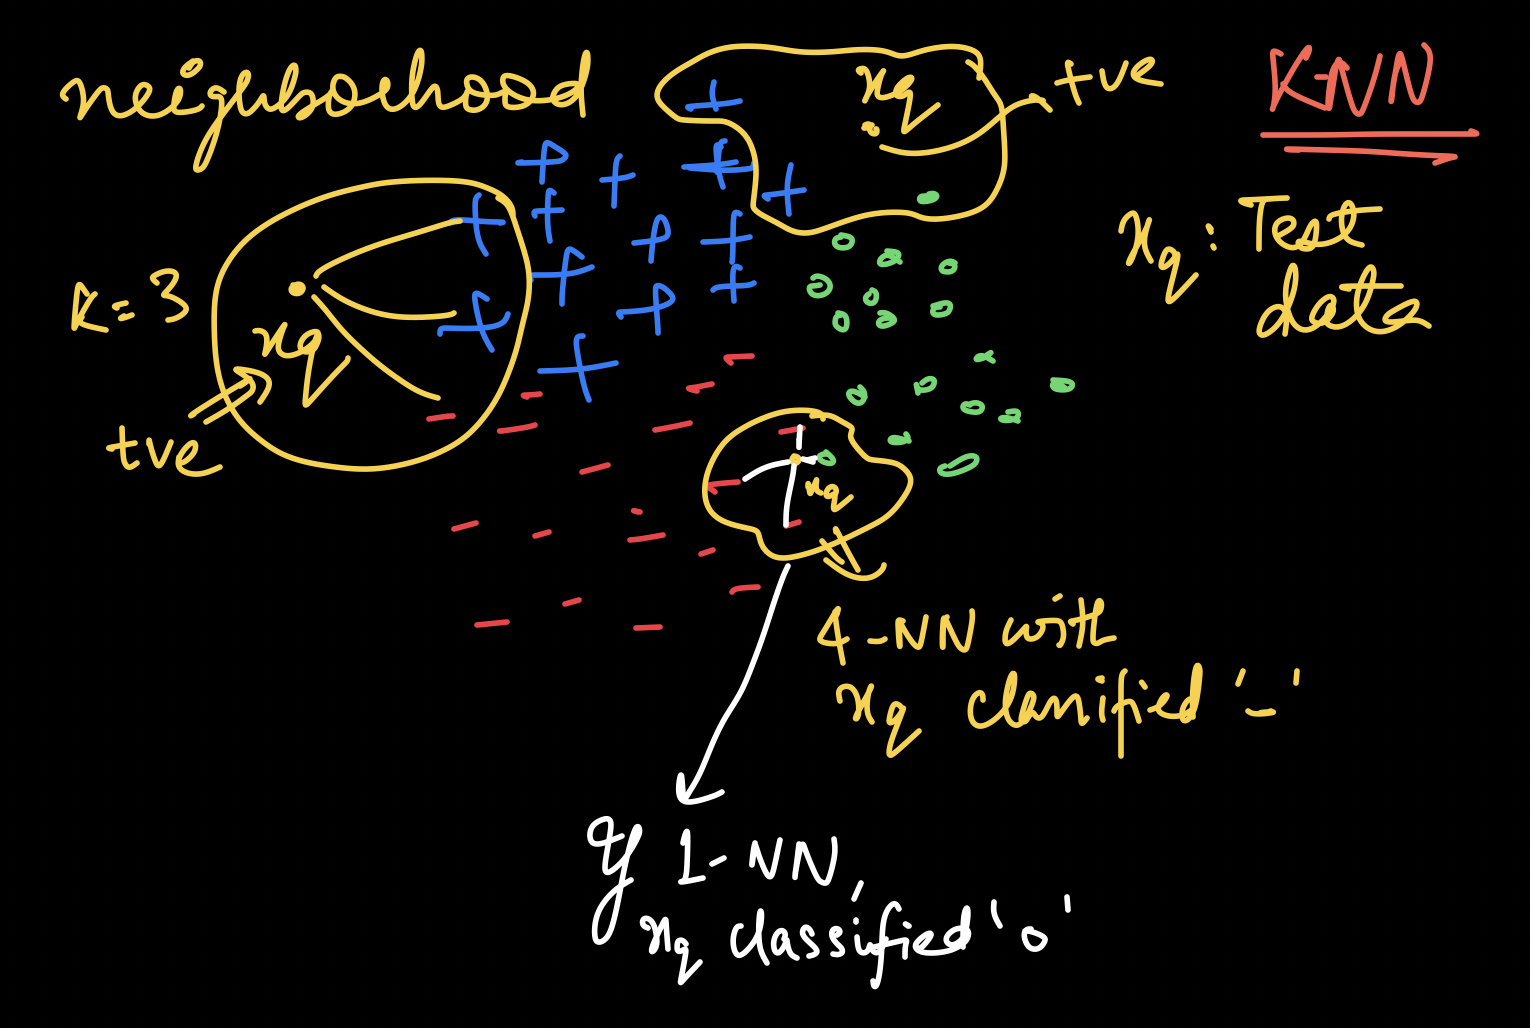


Lets understand KNN algorithm geometrically with a simple example:

 Lets assume we have a three class datapoints in our Training data:
 - -ve class data points
 - +ve class data points
 - 'o' class data points  


Now in our test data, we have a query point $x_q$

#### What will be the class label for $x_q$ at the top-right of the plot?
- From the plot, its  Most likely to be +ve class data point
- Since all the surrounding points are +ve with only one 'o' class datapoint

Now if we had a $x_q$ in the near the left side of the plot, 
#### what will the class label for $x_q$ be ? 
- +ve since the surrounding points are mostly +ve



**This shows that KNN is a neighborhood Algorithm, since it checks the neighborhood of $x_q$ and then assigns class label to the data point.**

#### But if now our $x_q$ is at point such that there are 3 -ve class data points and one class 'o' data point, what will the class label for $x_q$ for such case be ?
Since we are considering 4 points around $ x_q $ , we can say
 - $x_q$ belongs to -ve class since majority of neighbor points are -ve class labels

- but if we consider only 1 point around $x_q$, we can say
 - $x_q$ belongs to 'o' class since the distance between the 'o' class data point and $x_q$ is minimum

Hence this means that the number of points we consider as our neighborhood thus impacts the KNN. 
- Therefore the K in the KNN means the number of  points we are to consider as our neighborhood.

















Lets write the pseudo code for KNN algorithm when we have a data point $x_q$ in test data, 


# **The KNN Algorithm**
1. for each $x_i$ in training data
    - Compute distance between $x_i$ and $x_q$
    - And store it in a distance vector $D$
2. Sort the distance vector $D$
3. Then pick the K Nearest Neighbors, or the points which have the least distance from $x_q$
4. Take majority vote of class label from all the K points and return the class label which has the max vote for $x_q$ 

In simple words, 
- if we take K = 5, and after sorting the distance vector 
- we get 3 +ve class label data points and 2 -ve Class label data  
- then through majority voting, $x_q$ will belong to +ve class.

#### What will be the distance vector ?
for computing the distance between $x_i$ and $x_q$ 
- we will be using Euclidean distance.




    

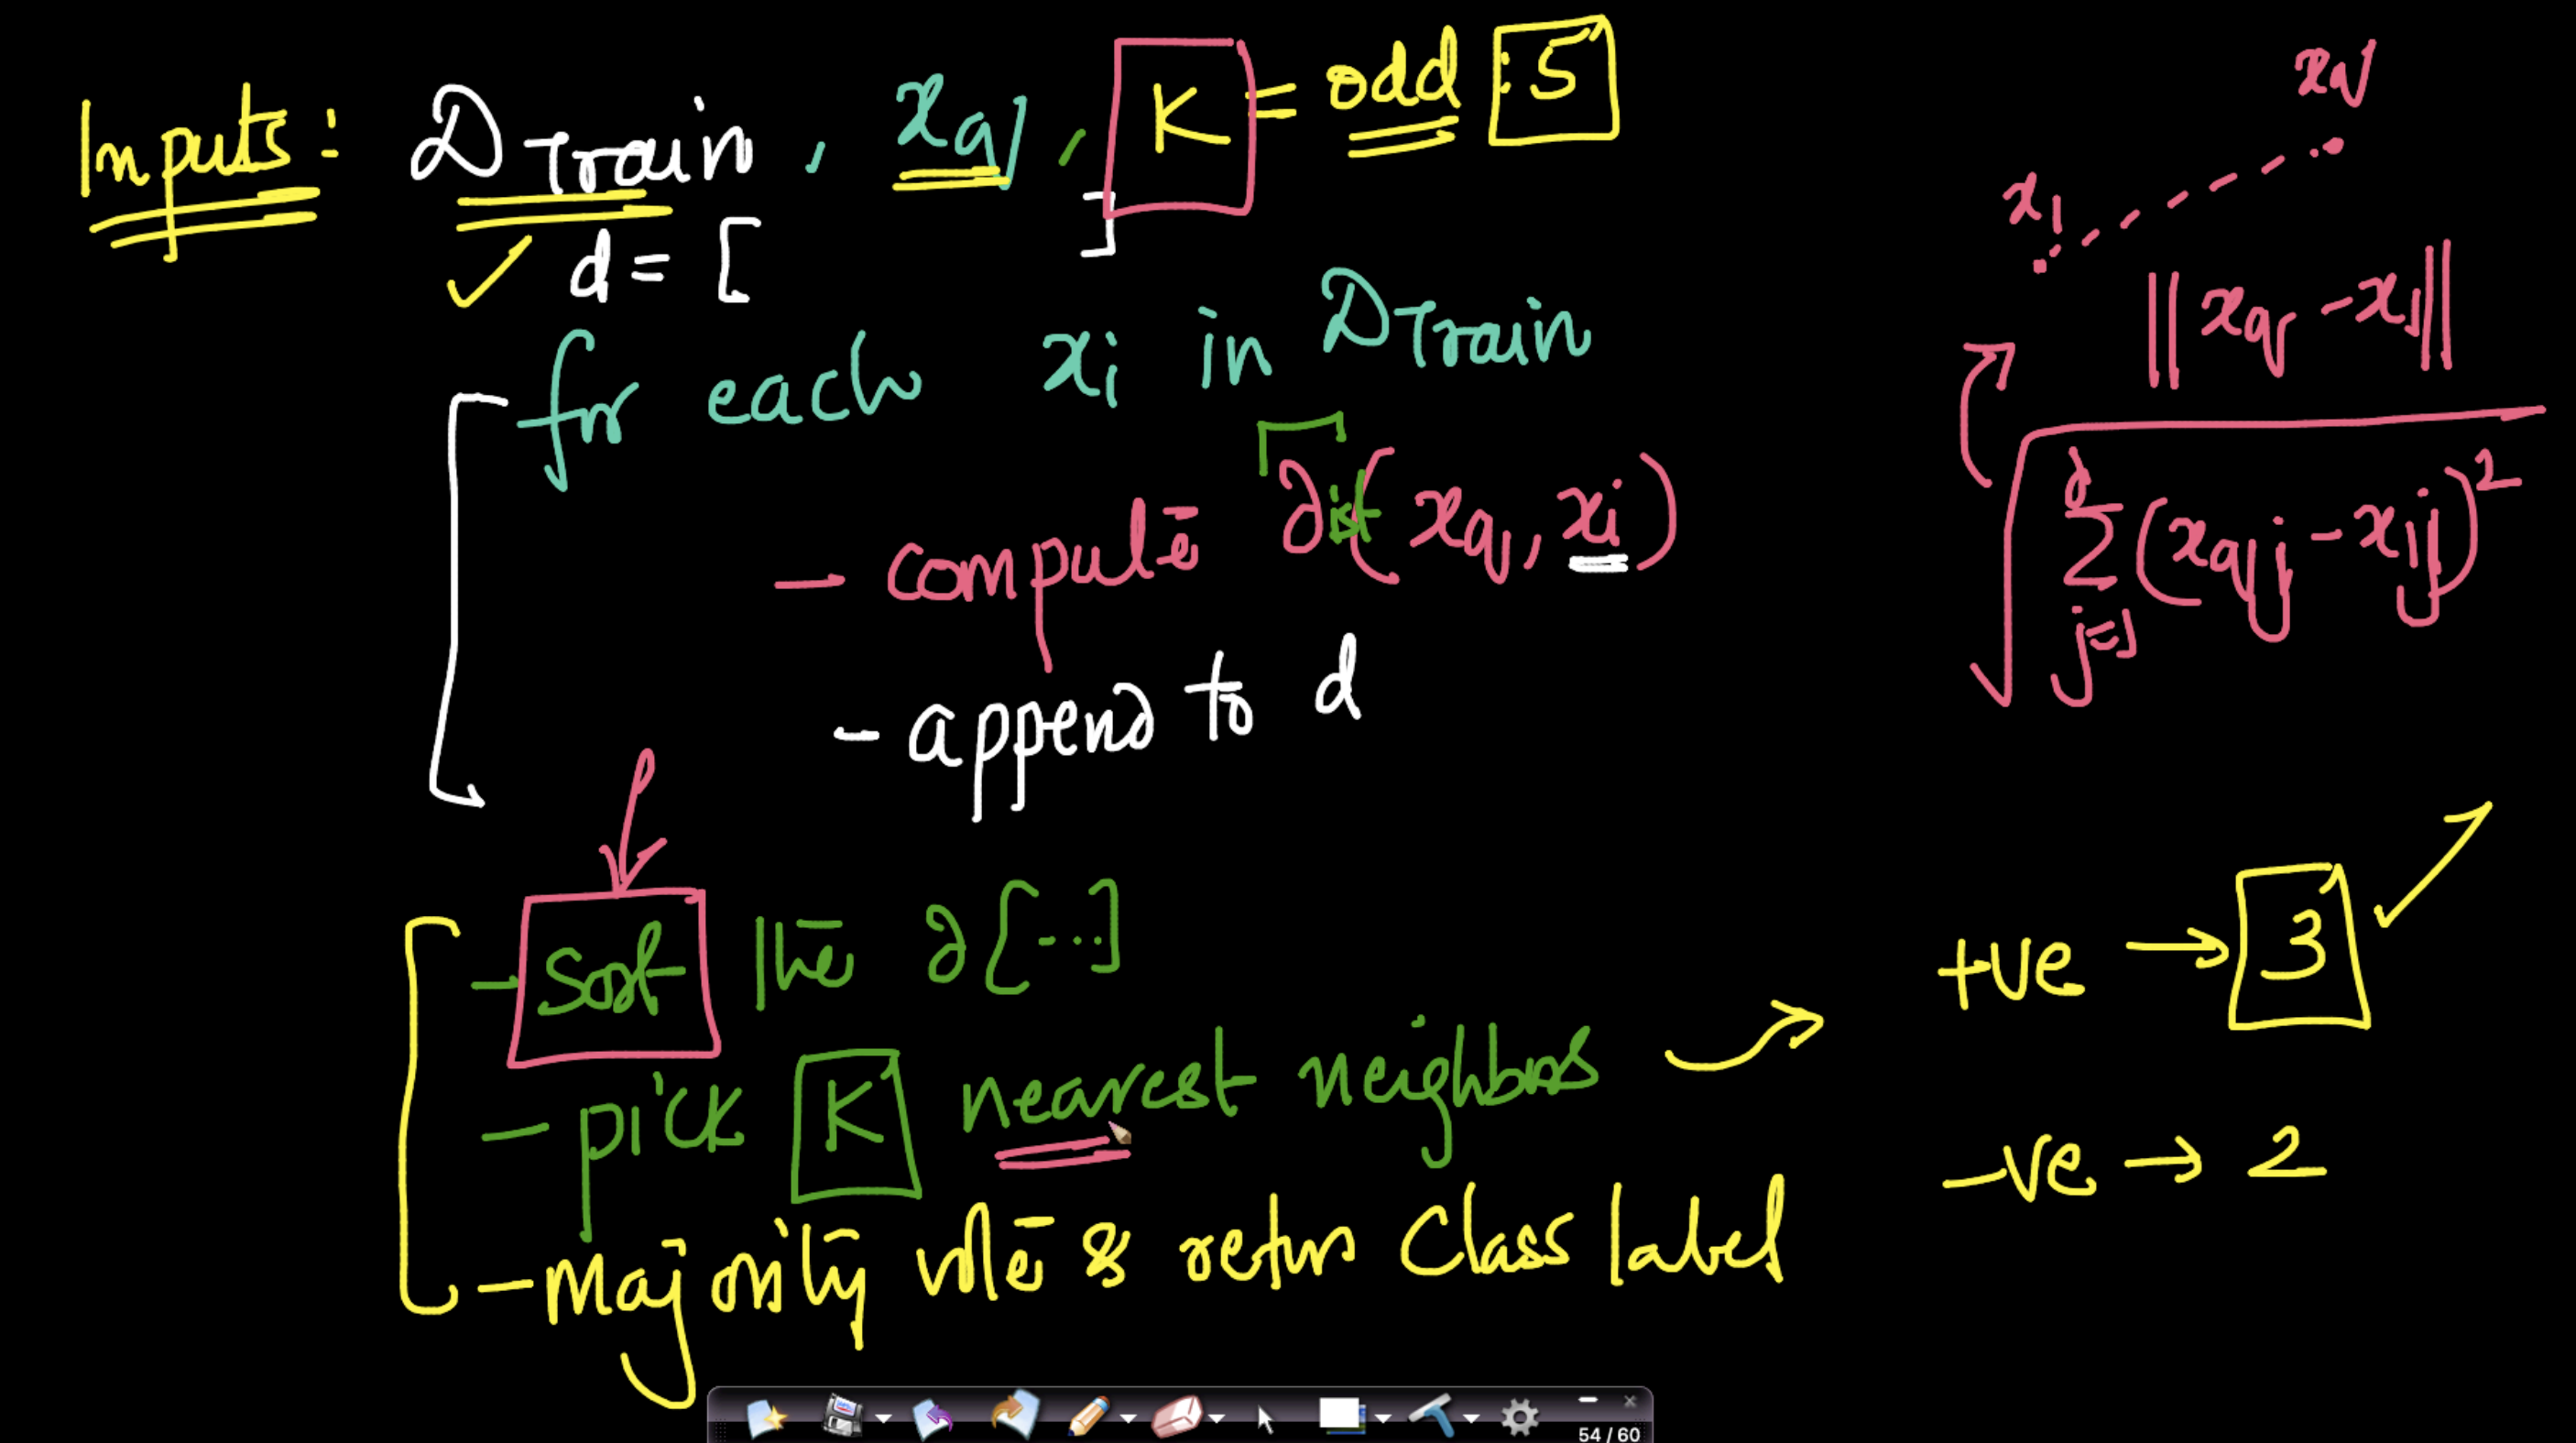

#### How does kNN perform multi-classification without using One-vs-Rest approach ?

Since our dataset has three class labels,

- and have $K_{best} = 5$
- Now if we have three test data, we will do the same steps 
 - of finding distance for each of the datapoints from these three test datapoints
 - Then perform a majority vote 
 - and select the majority class label for the test datapoint. 

For Example:
```
if k = 5, and there are 9 datapoints such that:
x1 = [1,2] belongs to Class A
x2 = [3,4] belongs to Class A
x3 = [4,2] belongs to Class A
x4 = [13,13] belongs to Class B
x5 = [10,14] belongs to Class B
x6 = [12,15] belongs to Class B
x7 = [5,5] belongs to Class C
x8 = [6,3] belongs to Class C
x9 = [7,3] belongs to Class C
``` 

Now if we have a query points of $x_{q1} = [2,4]$, $x_{q2} = [14,15]$, $x_{q3} = [7,5]$

#### Which class will the query points belong to ?
Ans:  With the majority vote in mind, it pretty clear
- [x1,x2,x3,x7] are nearest neighbors for $x_{q1}$, with majority belonging to class A hence  $x_{q1}$ belong to Class A
- Similarly, $x_{q2}$ will belong to Class B 
- And, $x_{q3}$ will belong to Class C

Showing how kNN does not need One vs Rest approach for multi-class setting





 


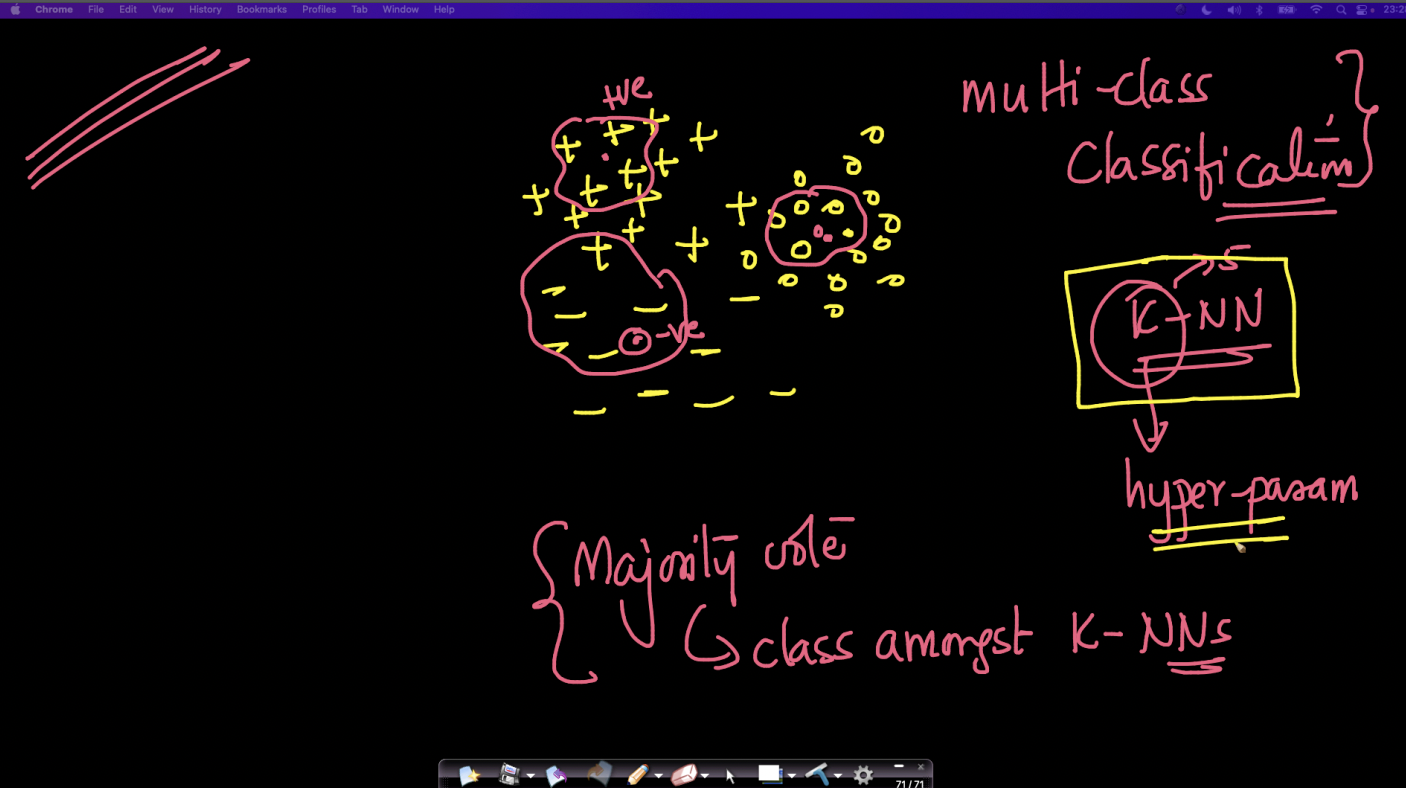

#### **Question: How kNN handles non-linearity in the data ?**

Lets Understand the Non-linearity part through an example:

- If our data looks like 3 concentric circles, where the 2nd Circle has all +ve class labels and 3rd Circle has all -ve class labels

    - Now if we take our K = 3,
        - and have $x_q$ in the 3rd circle, we will have a correct prediction of -ve label

        - now if $x_q$ is in the 2nd circle, we will have a correct prediction of +ve label

Showing that, kNN is able to correctly classify even if there is non-linearity in the data.
<br>

#### What will happen for the point $x_q$ which are in between 2nd Circle and 3rd Circle ? 
ANS: There can be cases where $x_q$ can be mis-classified.


With all of this we can conclude that:

- Manupilating with K value to find the $k_{best}$ of KNN when classifying test datapoints.

- Density of data: how closely the datapoints are to each other. Since KNN is after all a neighborhood algorithm, so homogeneity maintains for more dense data.


- And the gap between the classes helps in better separating datapoints according to class labels.















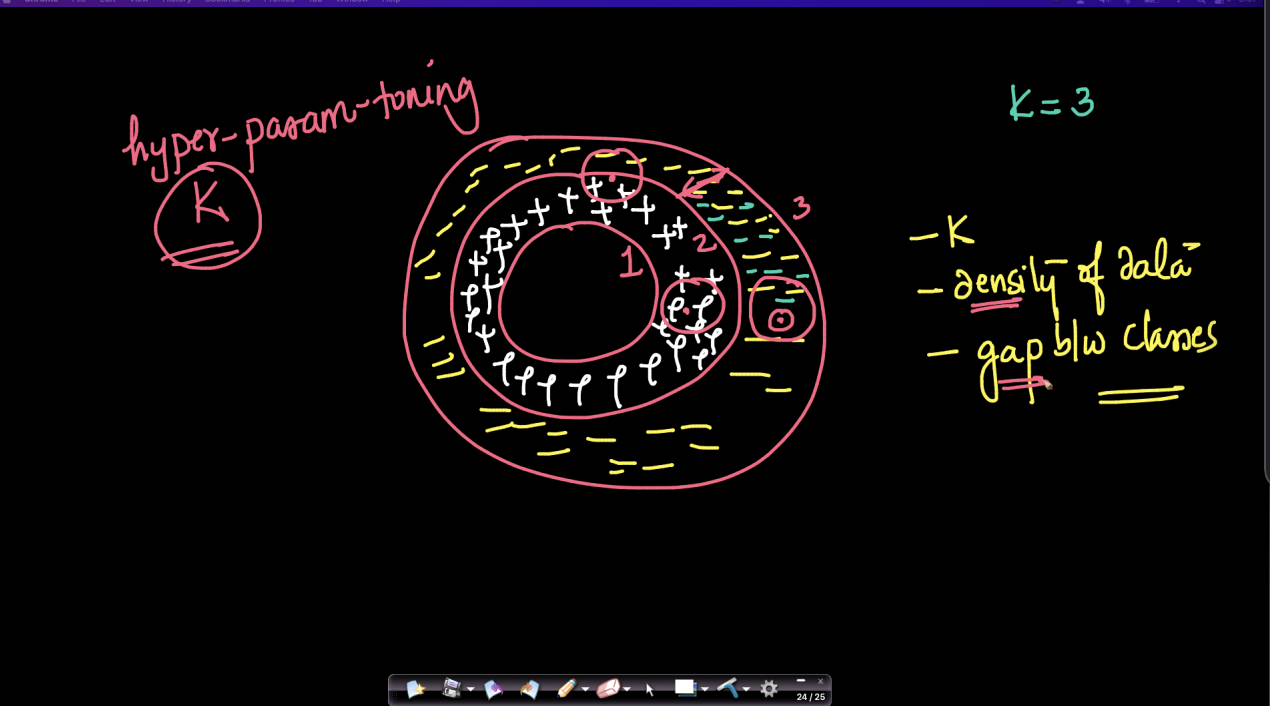

### Code Implementation of KNN from Scratch 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Lets create Synthetic Data
- f1 : Number of calls made to a learner to enroll them in a program.
- f2 : After attending the first masterclass in How manys days a person has taken the decision to enroll or not enroll.

In [ ]:
!gdown 1OT-cQgru6tEUlsBxEVDvKcfg5FmgQYml

Downloading...
From: https://drive.google.com/uc?id=1OT-cQgru6tEUlsBxEVDvKcfg5FmgQYml
To: /content/scaler.csv
100% 9.92k/9.92k [00:00<00:00, 14.9MB/s]


In [ ]:
data = pd.read_csv('scaler.csv')
data.shape

(400, 5)

In [ ]:
data.head()

,User_ID,Gender,No_of_Days,No_of_Calls,Enrolled
0,15624510,Male,0,0.30,0
1,15810944,Male,15,0.37,0
2,15668575,Female,6,2.07,0
3,15603246,Female,7,3.11,0
4,15804002,Male,0,4.52,0


Plotting f1 = No of Days, f2 = No of Calls and seeing how these feature classifies data


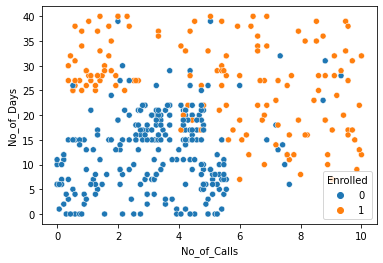

In [ ]:
sns.scatterplot(data= data, x= 'No_of_Calls',y = 'No_of_Days' , hue = 'Enrolled')

Here we can clearly see that the data is non-linearly seperable

Lets now splitting the data into train and test set by considering into these two features 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['No_of_Calls', 'No_of_Days']].values,\
                                                    data['Enrolled'].values,\
                                                    test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(268, 2) (268,)
(132, 2) (132,)


Standardization of data 

In [ ]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_test = (X_test-mu)/sig

kNN Implementation from Scratch

In [ ]:
def dist(x1,x2):
    """Euclidean distance between 2 vectors"""
    return np.sqrt(np.sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    
    distances = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        distances.append((d,Y[i]))
        
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]
    
    distances = np.array(distances)
    
    #print(distances)
    
    classes_counts = np.unique(distances[:,1],return_counts=True)
    #print(classes_counts)
    
    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]
    
    return int(pred)

taking the 100th test data as our $x_q$

In [ ]:
X_test[100]

array([1.52384549, 1.91535276])

Predicted class label for $x_q$

In [ ]:
knn(X_train, y_train, X_test[100])

1

Actual label for $x_q$

In [ ]:
y_test[100]

1

- notice that our model performed predicted the labels correctly

- Now lets see the accuracy of our KNN on test data

In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])

print(f'Accuracy :{round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2)}')

Accuracy :93.94


- We see how our KNN model performed quite well.